## Resources / Links / Ideas

https://github.com/yakovkor/Line-Follower-Drone/blob/master/image_converter.py<br>
https://const-toporov.medium.com/line-following-robot-with-opencv-and-contour-based-approach-417b90f2c298<br>
https://medium.com/computer-car/udacity-self-driving-car-nanodegree-project-1-finding-lane-lines-9cd6a846c58c<br>
cv2.minAreaRect(contours_blk[0]) approach this gives angle 

<br><br><br>

# Line Detection Algorithms

In [86]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import time 
import math

<br><br><br>

# HoughLines and HoughLinesP

* The Hough Line Transform is a transform used to detect straight lines.
* 
To apply the Transform, first an edge detection pre-processing is desirable<br><br>
  Hough Transform uses Polar systems  : r=xcosθ+ysinθ.

OpenCV implements two kind of Hough Line Transforms :
1. The Standard Hough Transform
    It consists in pretty much what we just explained in the previous section. It gives you as result a vector of couples (θ,rθ)
    In OpenCV it is implemented with the function HoughLines()
2. The Probabilistic Hough Line Transform
    A more efficient implementation of the Hough Line Transform. It gives as output the extremes of the detected lines (x0,y0,x1,y1)
    In OpenCV it is implemented with the function HoughLinesP()



<br><br><br>

## 1. HoughLines

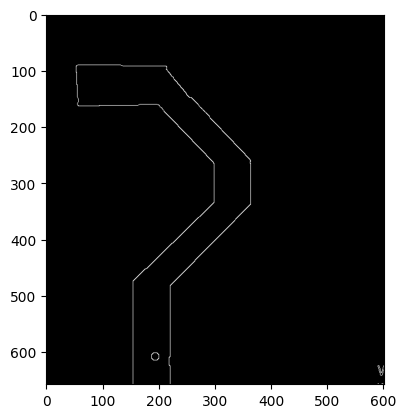

In [87]:
img = cv2.imread('resources/red_hough.png')

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 200, 255, apertureSize=3)

plt.imshow(edges,cmap="gray")

In [88]:
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 20, np.pi/180, 300)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
 
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
 
    # x0 stores the value rcos(theta)
    x0 = a*r
 
    # y0 stores the value rsin(theta)
    y0 = b*r
 
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
 
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
 
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
 
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
 
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (255, 0,0), 2)

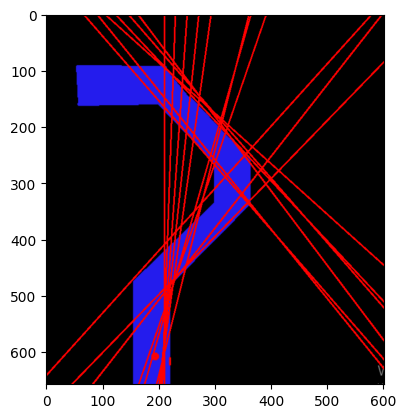

In [89]:
plt.imshow(img)

<br><br><br>

## 2. HoughLinesP

HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines <br>
cv2.HoughLinesP(canny, 1, np.pi / 180, 1, None, 20, 10)

*   @param image 8-bit, single-channel binary source image. The image may be modified by the function. 
*   @param lines Output vector of lines. Each line is represented by a 4-element vector
*   \f$(x_1, y_1, x_2, y_2)\f$ , where \f$(x_1,y_1)\f$ and \f$(x_2, y_2)\f$ are the ending points of each detected
*   line segment.
*   @param rho Distance resolution of the accumulator in pixels.
*   @param theta Angle resolution of the accumulator in radians.
*   @param threshold %Accumulator threshold parameter. Only those lines are returned that get enough
*   votes ( \f$>\texttt{threshold}\f$ ).
*   @param minLineLength Minimum line length. Line segments shorter than that are rejected.
*   @param maxLineGap Maximum allowed gap between points on the same line to link them.

In [90]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import time 
import math
import random

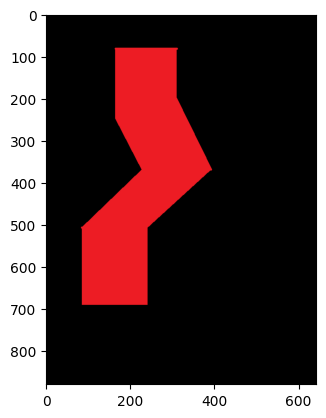

In [91]:
image = cv2.imread("resources/blog1.png")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

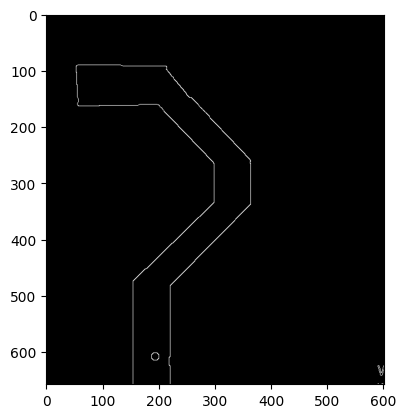

In [92]:
plt.imshow(edges,cmap="gray")

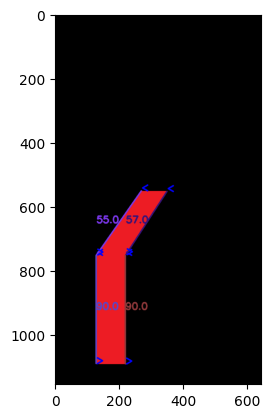

In [93]:
image = cv2.imread("resources/bg_black.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Kenarları algıla
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough dönüşümü ile çizgileri algıla
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=20)

# Algılanan çizgileri resme çiz, başına ve sonuna işaret koy, açı bilgisini yazdır
if lines is not None:
    for i, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]
        dy = (y2 - y1)
        dx = (x2 - x1)
        angle = np.rad2deg(np.arctan2(dy, dx))
        
        # Y ekseni aşağı doğru arttığı için açıyı tersine çevir
        angle = 180 - angle if angle > 0 else -angle
        
        # Farklı renkler için renk paleti
        color = tuple(np.random.randint(0, 255, 3).tolist())
        
        cv2.line(rgb_image, (x1, y1), (x2, y2), color, 3)
        cv2.putText(rgb_image, '>', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
        cv2.putText(rgb_image, '<', (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 3)
        cv2.putText(rgb_image, str(round(angle, 1)),(x1 , int((y1+y2)/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

plt.imshow(rgb_image)

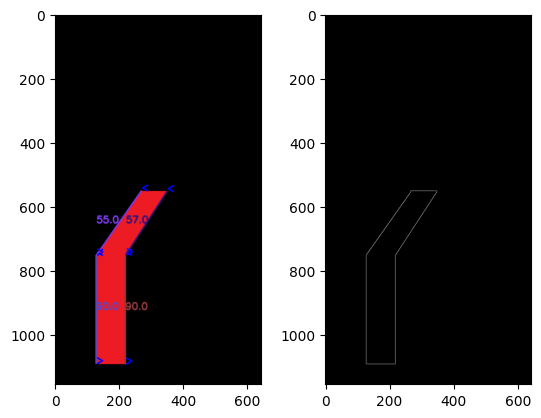

In [94]:
plt.subplot(121)
plt.imshow(rgb_image)

plt.subplot(122)
plt.imshow(edges,cmap="gray")

## Houghlinesp follower

In [5]:
background = cv2.imread("resources/clearred.png")
#background=background[554:1200,:1000,:3]
background.shape

(879, 643, 3)

In [6]:
x=80
y=640
#x=150
#y=500
vx=0
vy=1
slope_angle_degrees=9999

while True : 
    
    roi = background[y-100:y+100,x-75:x+100]
    gray_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    ret ,thresh = cv2.threshold(gray_roi,50,255,cv2.THRESH_BINARY)

    # Apply edge detection method on the image
    canny = cv2.Canny(gray_roi, 200, 255, apertureSize=3)
    #plt.imshow(canny,cmap="gray")

    # find lines
    linesP = cv2.HoughLinesP(canny, 1, np.pi / 180, 1, None, 50, 20)
    
    line_list=[]
    if linesP is not None:
        for i in range(0, len(linesP)):
            lines = linesP[i][0]
            cv2.line(gray_roi, (lines[0],lines[1]), (lines[2],lines[3]), (255,0,0), 3, cv2.LINE_AA)

            x1,y1,x2,y2 = lines[0],lines[1],lines[2],lines[3]

            line_list.append([x1,y1,x2,y2])
    
  
    
 
    if len(line_list)!=0:
        smallest_list=line_list[0]
        for line in line_list:
            if line[0]>smallest_list[0]:
                smallest_list=line
    
    x1,y1,x2,y2=smallest_list[0],smallest_list[1],smallest_list[2],smallest_list[3]
    try:
        slope= (y1-y2)/(x2-x1)
        slope = math.atan(slope)
        slope = math.degrees(slope)
        slope_angle_degrees=slope
    except:
        slope_angle_degrees=90
     

    cv2.line(roi,(x1,y1),(x2,y2),(100,100,0),4)

    print(slope_angle_degrees)
    
    if slope_angle_degrees<0:
        slope_angle_degrees=180+slope_angle_degrees # it will be negative when you use this angle with cosinus
        radian = math.radians(slope_angle_degrees)
        sin_angle = math.sin(radian)
        cos_angle=math.cos(radian)
         
        vx=1*cos_angle
        vy=1*sin_angle
        
        
    elif slope_angle_degrees>0 :
        radian = math.radians(slope_angle_degrees)
        sin_angle =(math.sin(radian))
        cos_angle=(math.cos(radian))

        if cos_angle<0.1:
            cos_angle=0
         
        vx=1*cos_angle
        vy=1*sin_angle
    else:
        print("horizontal")
        vy=0
        vx=1*vx_former


    if slope_angle_degrees is not None:
        text=f"degree :{str(slope_angle_degrees)} - vx = {str(vx)} - vy = {str(vy)}"
        cv2.putText(background,text, org = (15, 30), fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 0.4,color = (125, 246, 55), thickness = 1)
    else:
        cv2.putText(background,"cant find angle", org = (15, 30), fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 0.4,color = (125, 246, 55), thickness = 1)

     

    if vx>0 and vy!=0:
        y-=int(vy)+1
        x+=int(vx)+1
        vx_former=1
    elif vx>0 and vy==0:
        y-=0
        x+=int(vx)+1
        vx_former=1

    elif vx<0 and vy!=0:
        y-=int(vy)+1
        x+=int(vx)-1
        vx_former=1
    
    elif vx<0 and vy==0:
        y-=0
        x+=int(vx)-1
        vx_former=-1
    
    else:
        y-=1
        x+=0
        
    cv2.circle(background,(x,y),3,(255,0,0),3)

    time.sleep(0.05)
   

    cv2.imshow("gray_roi",gray_roi)
    cv2.imshow("roi",roi)
    cv2.imshow("thresh",thresh)
    cv2.imshow("background",background)
     
    k=cv2.waitKey(27)
    if k==27:
        break
        
    # refresh background
    background = cv2.imread("resources/clearred.png")
    #background=background[554:1200,:600,:3]
    
cv2.destroyAllWindows()

C:\Users\sirom\AppData\Local\Temp\ipykernel_7152\2476741070.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  slope= (y1-y2)/(x2-x1)


90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
90.0
52.04576912486749
90.0
51.89242312248514
90.0
51.74557964748282
51.0724564072077
50.9468630539735
49.86451443776053
52.19347005529554
50.648247373735266
50.71059313749964
51.9810574068298
51.22582906442577
51.34019174590991
50.38931175997341
50.76263288659845
50.648247373735266
50.9061411137705
51.34019174590991
50.10216525235819
50.3709946955357
51.23448009554123
50.19442890773481


<br><br><br><br>

## 3. Custom Line Detection without any opencv algorithm

It is all about slope . you decide y1 and y2 . After choosing them you are gonna find index of  most right 255  for y1 andy2x2 seperately<br>
In this way you are gonna obtain x1 y1 x2 y2 . You can find slope and use it for acceleration

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import time 
import math

In [3]:
background = cv2.imread("resources/bg_hard.png")
#background=background[554:1200,:1000,:3]
 

In [4]:
x=165
y=640
#x=150
#y=500
vx=0
vy=1
slope_angle_degrees=9999

while True : 
    
    roi = background[y-100:y+100,x-150:x+100]
    gray_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    ret ,thresh = cv2.threshold(gray_roi,50,255,cv2.THRESH_BINARY)
 
    
    
    try:
        index = np.where(thresh[100][::-1] == 255)[0][0]
        first_index = len(thresh[100]) - 1 - index
    
        index = np.where(thresh[110][::-1] == 255)[0][0]
        second_index = len(thresh[110]) - 1 - index
        
    
        x1,y1,x2,y2=first_index , 110 , second_index , 100
    
        cv2.line(roi,(x1,y1),(x2,y2),(255,0,0),2)
    
        if x1!=x2:
            
            slope=(y2-y1)/(x2-x1)
            slope_angle_radians = math.atan(slope)
            slope_angle_degrees = math.degrees(slope_angle_radians)
    
    
            if slope_angle_degrees<0:
                slope_angle_degrees=180+slope_angle_degrees # it will be negative when you use this angle with cosinus
                radian = math.radians(slope_angle_degrees)
                sin_angle = math.sin(radian)
                cos_angle=math.cos(radian)
                vx=1*cos_angle
                vy=1*sin_angle
                
                
            else:
                radian = math.radians(slope_angle_degrees)
                sin_angle = math.sin(radian)
                cos_angle=math.cos(radian)
                vx=1*cos_angle
                vy=1*sin_angle
     
            
        else:
            vx=0
            vy=1
            slope_angle_degrees=90
    
        if slope_angle_degrees is not None:
            text=f"degree :{str(slope_angle_degrees)} - vx = {str(vx)} - vy = {str(vy)}"
            cv2.putText(background,text, org = (15, 30), fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 0.4,color = (125, 246, 55), thickness = 1)
        else:
            cv2.putText(background,"cant find angle", org = (15, 30), fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 0.4,color = (125, 246, 55), thickness = 1)
    except:
        print("no roi")
        
    
    print(slope_angle_degrees)

    if vx>0:
        y-=int(vy)+1
        x+=int(vx)+1
    elif vx<0:
        y-=int(vy)+1
        x+=int(vx)-1
    else:
        y-=int(vy)+1
        x+=0
        
    cv2.circle(background,(x,y),3,(255,0,0),3)

    time.sleep(0.05)
   

    cv2.imshow("roi",roi)
    cv2.imshow("thresh",thresh)
    cv2.imshow("background",background)
     
    k=cv2.waitKey(27)
    if k==27:
        break
        
    # refresh background
    background = cv2.imread("resources/bg_hard.png")
    #background=background[554:1200,:600,:3]
    
cv2.destroyAllWindows()

90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
84.28940686250037
78.69006752597979
73.30075576600639
68.19859051364818
63.43494882292201
59.03624346792648
55.00797980144134
51.34019174590991
48.01278750418334
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
48.01278750418334
48.01278750418334
48.01278750418334
48.01278750418334
48.01278750418334
48.01278750418334
48.01278750418334
48.01278750418334
48.01278750418334
48.01278750418334
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
45.0
48.01278750418334
48.01278750418334
48.012